<a href="https://colab.research.google.com/github/Glitch1258/MyCode-HospitalManagementSystem/blob/main/CSE_715_report_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3474 - val_loss: 0.1829
Epoch 2/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1730 - val_loss: 0.1519
Epoch 3/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1498 - val_loss: 0.1418
Epoch 4/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1419 - val_loss: 0.1373
Epoch 5/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1378 - val_loss: 0.1341
Epoch 6/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1341 - val_loss: 0.1314
Epoch 7/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1321 - val_loss: 0.1296
Epoch 8/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1303 - val_loss: 0.1277
Epoch 9/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1283 - val_loss: 0.1265
Epoch 10/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1270 - val_loss: 0.1254
Epoch 11/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1253 - val_loss: 0.1222
Epoch 12/120
247/247 ━━━━━━━━━

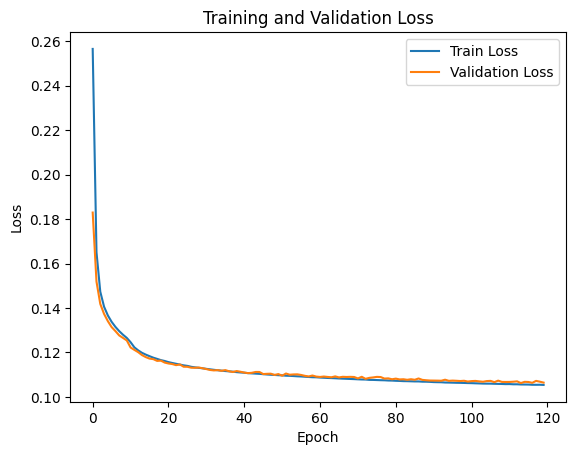

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.optimize import linear_sum_assignment
import time

# Load and preprocess MNIST data
(x_train, _), (x_test, y_test) = mnist.load_data()
x_all = np.concatenate([x_train, x_test], axis=0)
x_all = x_all.astype("float32") / 255.0
x_all = x_all.reshape((x_all.shape[0], -1))  # Flatten to 784

# Build autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(10, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output_img = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, output_img)
encoder = Model(input_img, bottleneck)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_all, x_all, epochs=120,batch_size=256,shuffle=True,validation_split=0.1)

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
#plt.savefig("loss_curve.png")
plt.show()
#plt.close()



# Extract features from encoder
features = encoder.predict(x_all)




Time taken with encoding: 1.51 seconds
Clustering Accuracy: 0.5616


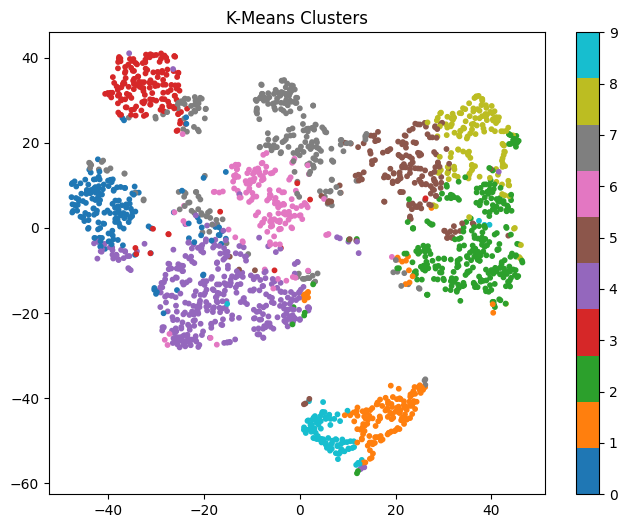

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)

start = time.time()
pred_labels = kmeans.fit_predict(features)
end = time.time()
print(f"Time taken with encoding: {end - start:.2f} seconds")

# Evaluate clustering accuracy
y_true = y_test
y_pred = pred_labels[-10000:]  # Last 10k samples are from test set

def cluster_accuracy(y_true, y_pred):
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=int)
    for i in range(len(y_pred)):
        w[y_pred[i], y_true[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(row_ind, col_ind)]) / y_pred.size

accuracy = cluster_accuracy(y_true, y_pred)
print(f"Clustering Accuracy: {accuracy:.4f}")

# t-SNE visualization of clusters
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features[:2000])
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=pred_labels[:2000], cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10))
plt.title("K-Means Clusters")
#plt.savefig("tsne_clusters.png")
#plt.close()
plt.show()

Time taken without encoding: 94.64 seconds
Clustering Accuracy: 0.5450


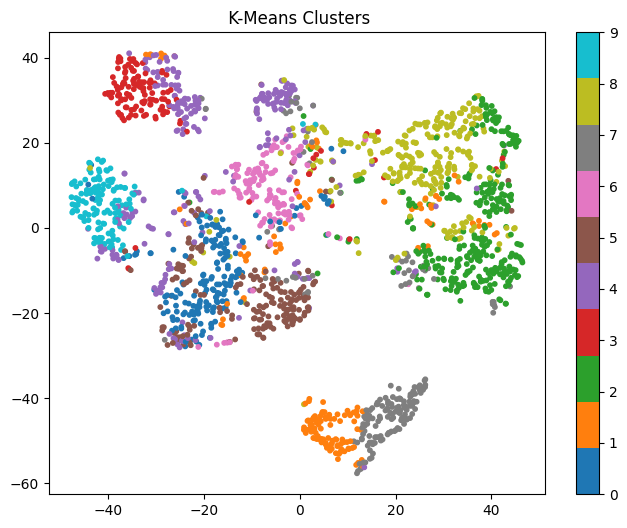

In [ ]:
start2 = time.time()
pred_labels = kmeans.fit_predict(x_all)
end2 = time.time()
print(f"Time taken without encoding: {end2 - start2:.2f} seconds")

# Evaluate clustering accuracy
y_true = y_test
y_pred = pred_labels[-10000:]  # Last 10k samples are from test set



accuracy = cluster_accuracy(y_true, y_pred)
print(f"Clustering Accuracy: {accuracy:.4f}")

# t-SNE visualization of clusters
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features[:2000])
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=pred_labels[:2000], cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10))
plt.title(" K-Means Clusters")
#plt.savefig("tsne_clusters.png")
#plt.close()
plt.show()
